# 随机梯度下降

### 1. 导入依赖 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
from scipy.sparse import linalg

### 2. 切分数据集 

In [2]:

Dataset = load_svmlight_file('housing_scale.txt', n_features=13)
X_train, X_val, y_train, y_val = train_test_split(Dataset[0], Dataset[1], test_size=0.2, random_state=888)

### 3. 构建线性回归函数 

### 损失函数 

In [3]:
def L2Loss(y, y_):
    return ((y-y_)**2)

def L1Loss(y, y_):
    return np.abs(y-y_)

Loss = L2Loss

### 4. 在验证集上计算loss 

In [6]:
W = np.random.normal(1, 1, size=(13))  
pred_init = X_train.dot(W)
loss_init = Loss(pred_init, y_train)
print('loss = {}'.format(loss_init.mean()))

loss = 681.6427696138634


### 5. SGD 

In [12]:
EPOCH_NUM = 80
LR = 3e-4

factor = 0.8

In [13]:
losses_train, losses_val = [], []

batch_idxs_pool = np.arange(X_train.shape[0])

for epoch in range(EPOCH_NUM):
#     for step in range(X_train.shape[0] // BATCH_SIZE):
#         batch = np.random.choice(batch_idxs_pool, size=BATCH_SIZE)
    for batch in range(X_train.shape[0]):
        X, y = X_train[batch], y_train[batch]

        grad = X.T.dot(X.dot(W)-y) #+ PENALTY_FACTOR*w
        grad = -grad / X.shape[0]
        W += LR * grad

    losses_train.append(Loss(X_train.dot(W), y_train).mean())
    losses_val.append(Loss(X_val.dot(W), y_val).mean())
#     print('Epoch: #{}\tLoss_train: {}\tLoss_val: {}'.format(epoch+1, losses_train[-1], losses_val[-1]))

print('Losstrain is {:.3f}, Loss_val is {:.3f}'.format(losses_train[-1], losses_val[-1]))

Losstrain is 26.100, Loss_val is 25.041


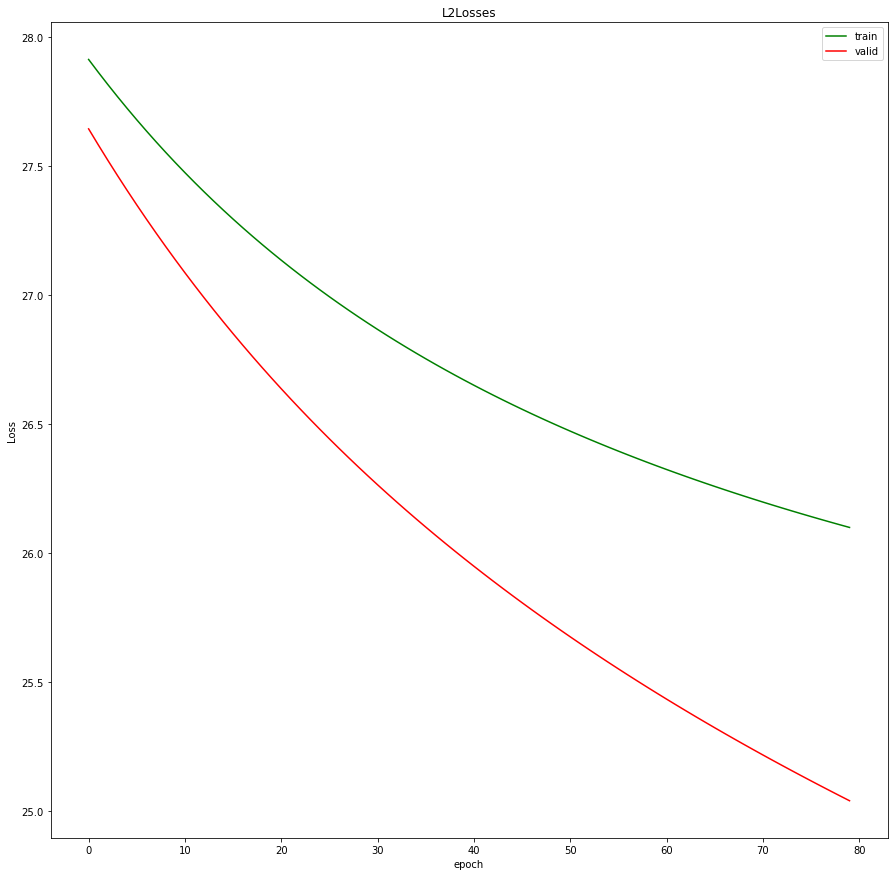

In [15]:
plt.figure(figsize=[15,15])
plt.title('L2Losses')
plt.plot(losses_train, c='g', label='train')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.plot(losses_val, c='r', label='valid')
plt.legend()
plt.show()